# **Linear Regression on Bike Sharing**

<hr>

**Storyline**

RentoBikes,  a leading US bike-sharing provider, is addressing pandemic-induced revenue challenges by analyzing factors influencing bike demand. Engaging a consulting firm, they aim to predict demand post-lockdown and tailor their strategy. Data preparation involves converting numeric variables and retaining the 'yr' column for its predictive value. The model, focusing on the 'cnt' variable, aims to reveal insights into demand dynamics, guiding BoomBikes in optimizing their services for post-Covid market recovery

<hr>


<hr>

# **Stage 1: Reading and Understanding the data**

In [2]:
# Libraries needed
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# warning supression
import warnings
warnings.filterwarnings('ignore')

# data reading
df = pd.read_csv('D:/Python Programming/Training/Datasets/BikeSharingData.csv')

**Data Inspection**

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Check for the null values**

In [5]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# **Insights:**

    1. Dropping the columns that are not required for the modelling
    
        a. Instant: This is just telling about row number, not required

        b. Casual and Registered: no need as the dependent variable is count.
        
        c. The columns 'dteday' and 'yr month' contains the same data. To eliminate the redundancy we will drop 'dteday'.

**The variable 'casual' is telling us about the number of casual users who have made a booking. The column 'registered', on the other side, shows the total number of registered users who have made a booking. Finally, the 'cnt' column indicates teh total number of bike rentals, including casual and registered. So, we are going to build the model on the basis of 'cnt' columns**

In [6]:
df.drop(columns = ['instant', 'casual', 'registered', 'dteday'], inplace = True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [9]:
a = df.shape
print(f'The data presented is having {a[0]} rows and {a[1]} columns')

The data presented is having 730 rows and 12 columns


<hr>

# **Check for the correlation**

<Figure size 800x500 with 0 Axes>

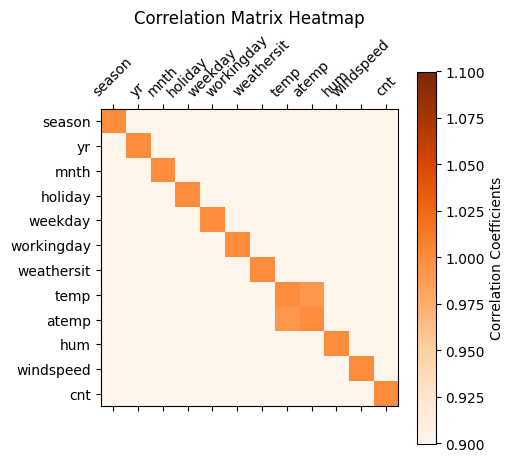

In [18]:
corr = df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()